## Packages

In [3]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [4]:
euets_path = "/Users/joshder/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofToronto/Nazanin Khazra - Emissions Trade/Raw data/EU ETS/eutl"

account_holder = pd.read_csv(euets_path + "/account_holder.csv")
account_type = pd.read_csv(euets_path + "/account_type.csv")
account = pd.read_csv(euets_path + "/account.csv")
activity_type = pd.read_csv(euets_path + "/activity_type.csv")
compliance_code = pd.read_csv(euets_path + "/compliance_code.csv")
compliance = pd.read_csv(euets_path + "/compliance.csv")
country_code = pd.read_csv(euets_path + "/country_code.csv")
foha_matching = pd.read_csv(euets_path + "/foha_matching.csv")
installation = pd.read_csv(euets_path + "/installation.csv")
nace_code = pd.read_csv(euets_path + "/nace_code.csv")
project = pd.read_csv(euets_path + "/project.csv")
surrender = pd.read_csv(euets_path + "/surrender.csv")
transaction_type_main = pd.read_csv(euets_path + "/transaction_type_main.csv")
transaction_type_supplementary = pd.read_csv(euets_path + "/transaction_type_supplementary.csv")
transaction = pd.read_csv(euets_path + "/transaction.csv")
unit_type = pd.read_csv(euets_path + "/unit_type.csv")

In [5]:
# add account types to account dataframe

account = pd.merge(account, account_type, left_on = 'accountType_id', right_on = "id", how = "left")
account.drop(['id_y'], axis = 1, inplace = True)
account.rename(columns = {'id_x': 'id', 'description': 'account_type_description'}, inplace = True)

In [6]:
# add registry country names from ids to installation dataframe

installation = pd.merge(installation, country_code, left_on = 'registry_id', right_on = 'id', how = 'left')
installation.drop(['id_y'], axis = 1, inplace = True)
installation.rename(columns = {'id_x': 'id', 'description': 'registry_country'}, inplace = True)

## Summary Statistics and Visualisations

### Number of Installations Owned by Companies

In [7]:
# count number of installations for each account by Company Registration Number

num_installations = account[['companyRegistrationNumber', 'installation_id']].dropna()
num_installations_by_account = num_installations.groupby('companyRegistrationNumber').count()
num_installations_by_account.rename(columns = {'installation_id': "Number of Installations Owned"}, inplace = True)

<AxesSubplot:xlabel='Number of Installations Owned', ylabel='Density'>

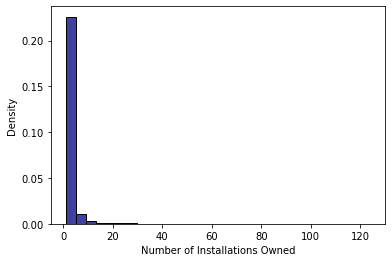

In [8]:
sns.histplot(data = num_installations_by_account, x="Number of Installations Owned", stat="density", bins = 30, color = 'navy')

In [9]:
num_installations_by_account.describe()

,Number of Installations Owned
count,10827.000000
mean,2.587328
std,4.175666
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,124.000000


Most EU ETS accounts own 2 or less installations. However, some accounts own many installations with a maximum of 124. The distribution of number of installations owned is heavily right skewed. This is expected as most firms are not very large international companies with large portfolios of assets alongside the presenece of these very large in the EU ETS.

### Number of Installations Per NACE sector

In [10]:
# count the number of installations in each NACE parent sector

num_installations_by_nace = installation[['id', 'nace_id']].dropna()
num_installations_by_nace['nace_parent'] = num_installations_by_nace['nace_id'].apply(lambda x: math.trunc(x))

In [11]:
num_installations_by_nace.drop(['nace_id'], axis = 1, inplace = True)
num_installations_by_nace = num_installations_by_nace.groupby('nace_parent').count()
num_installations_by_nace.reset_index(inplace = True)
num_installations_by_nace['nace_parent'] = pd.to_numeric(num_installations_by_nace['nace_parent'])
num_installations_by_nace['nace_parent'] = num_installations_by_nace['nace_parent'].apply(lambda x: float(x))
num_installations_by_nace.rename(columns = {'id': 'num_installations'}, inplace = True)

In [65]:
num_installations_by_nace

,nace_parent,num_installations
0,1.00,139
1,5.00,3
2,6.00,298
3,7.00,12
4,8.00,54
5,9.00,9
6,10.00,1021
7,11.00,175
8,12.00,9
9,13.00,138


In [13]:
num_installations_by_nace.describe()

,nace_parent,num_installations
count,58.000000,58.000000
mean,37.534483,287.551724
std,23.662996,869.322163
min,1.000000,1.000000
25%,18.250000,5.500000
50%,32.500000,28.000000
75%,55.250000,134.250000
max,86.000000,5708.000000


NACE level 2 sector codes indicate the nature of an installations activities. In the EU ETS most installations are in the manufacturing sector, followed by energy. Note, NACE code data is not complete for all installations.

### Number of Installations Per Country

In [14]:
# count number of installations registered in each country

num_installations_by_country = installation[['registry_country', 'id']]
num_installations_by_country.rename(columns = {'registry_country': "Country"}, inplace = True)
num_installations_by_country = num_installations_by_country.groupby('Country').count()
num_installations_by_country.rename(columns = {'id': "Number of Installations"}, inplace = True)

/Users/joshder/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='Number of Installations', ylabel='Count'>

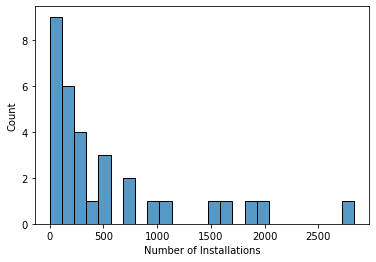

In [67]:
sns.histplot(num_installations_by_country, x = 'Number of Installations', bins = 25)

In [16]:
num_installations_by_country.describe()

,Number of Installations
count,32.000000
mean,556.906250
std,697.597322
min,2.000000
25%,96.000000
50%,272.500000
75%,706.750000
max,2832.000000


In [17]:
num_installations_by_country

,Number of Installations
Country,
Austria,297
Belgium,524
Bulgaria,177
Croatia,66
Cyprus,29
Czech Republic,472
Denmark,470
Estonia,66
Finland,754


On average, each country has approximately 560 installations. Germany has the most installations with 2832 and Liechtenstein has the least with 2. There is a large amount of variation amount country installations (standard deviation of nearly 700). 

### Surrenders Over Time

In [19]:
surrender_by_year = surrender[['reportedInSystem', 'year', 'amount']]

In [20]:
surrender_by_year = surrender_by_year.groupby('year').sum()

In [21]:
surrender_by_year.reset_index(inplace = True)

In [22]:
surrender_by_year.rename(columns = {'year': 'Year', 'amount': 'Amount Surrendered'}, inplace = True)

In [23]:
surrender_by_year

,Year,Amount Surrendered
0,2005,1639886407
1,2006,2345026299
2,2007,2031219256
3,2008,2081906392
4,2009,1712923838
5,2010,1486450396
6,2011,1232188633
7,2012,1143826316
8,2013,1909664701
9,2014,1917536305


<AxesSubplot:xlabel='Year', ylabel='Amount Surrendered'>

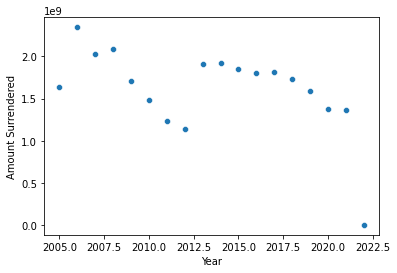

In [24]:
sns.scatterplot(data=surrender_by_year, x="Year", y="Amount Surrendered")

As a proxy for emissions, surrenders are the amount of allowances accounts must give up matching their annual emissions. From the scatter plot, total surrenders are decreasing which is expected aligned with the emmissions cap being reduced over time. This trend is mechanical as a result of the reducing cap set by the EU ETS but an important metric to check to ensure emmissions are being reduced. The jump at 2012 corresponds to the end of the initial period of the EU ETS and the subsequent restart. 

### Transactions

In [42]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
transaction[['amount']].describe()

,amount
count,1929941.00
mean,141191.38
std,7419394.34
min,1.00
25%,2894.00
50%,9750.00
75%,28684.00
max,4868096694.00


<AxesSubplot:xlabel='amount', ylabel='Density'>

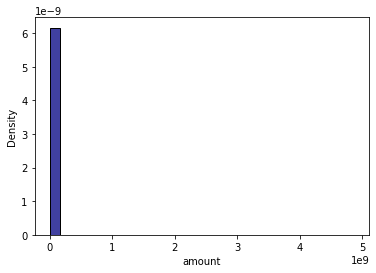

In [49]:
sns.histplot(data = transaction, x="amount", stat="density", bins = 30, color = 'navy')

There were almost 2 million transactions in this data. The average amount of allocations traded were approximately 140,000 units (1 unit equivalent to 1 tonne of CO2). Trades ranged from 1 unit to approximatley 4.9 billion with extremely high with a standard deviation of almost 7.5 million.